0.2838199195183906
test/0169.pdf300/1919-1584-129-35.png lld
test/0169.pdf300/455-1259-119-36.png lld
test/0169.pdf300/1827-1725-118-35.png lld
test/0185.pdf300/944-1520-117-36.png lld
test/0185.pdf300/396-1682-122-37.png lld
test/0176.pdf300/2248-768-118-35.png lld
test/0186.pdf300/1481-738-116-36.png lld
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
[191]


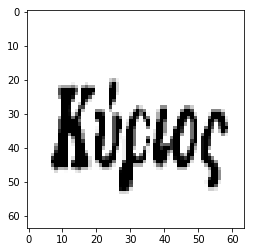

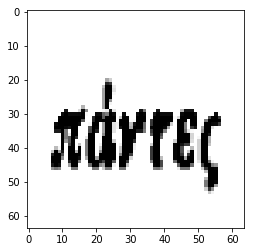

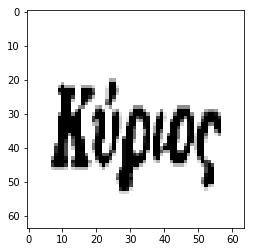

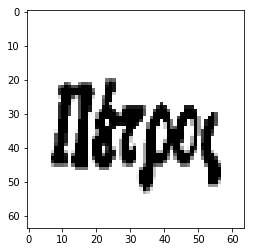

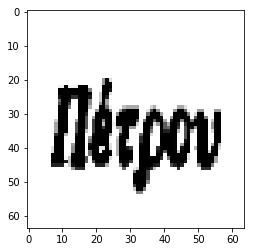

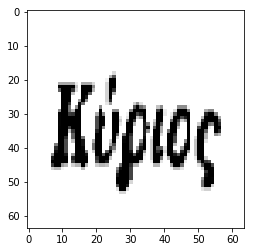

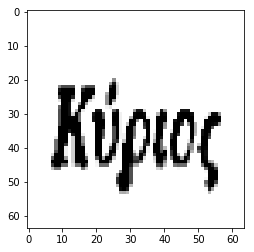

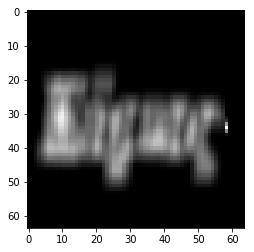

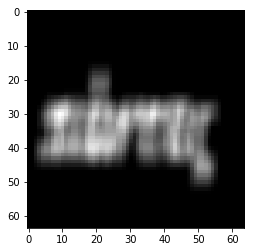

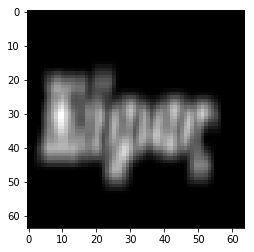

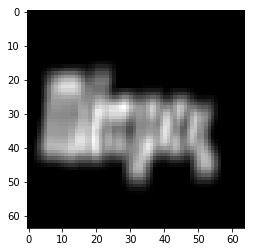

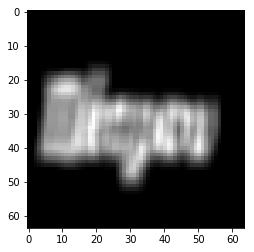

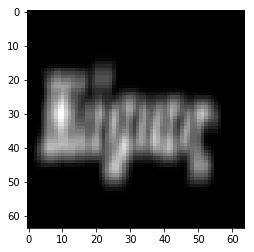

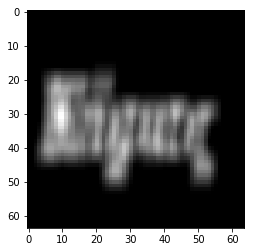

In [58]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
def compareHUandSC(queryFile, dataFile):
        
        params={}
        
        query= cv2.imread(queryFile,0);
        erodeimg=applyCircleErosion(query)
        _, QueryContours, _ = cv2.findContours(erodeimg, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        
        data = cv2.imread(filename,0)

        if data is None:
            params["DA"]="NONE"
            return params
        else:
            params["DA"]="EXIST"
            erodedata=applyCircleErosion(data)
            _, DataContours, _ = cv2.findContours(erodedata, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        
        
        if len(DataContours)>1:
            params["CO"]="EXIST"
           
            
            
            #cut off the very disimilar images using HU moments for speeding the algorithm
            ret = cv2.matchShapes(QueryContours[1],DataContours[1],3,0.0)
            params["HU"]=ret
            if ret<0.3:
                sd = cv2.createShapeContextDistanceExtractor()
                try:
                    abc = sd.computeDistance(QueryContours[1],DataContours[1])
                    params["SC-CM"]="EXIST"
                    params["SC"]=abc    
                    (x, y, w, h) = cv2.boundingRect(DataContours[1])   
                    OSfilename=Path(filename)
                    params["PA"]=OSfilename
                   
                except:
                    params["SC-CM"]="NONE" 
                    (x, y, w, h) = cv2.boundingRect(DataContours[1])
                    OSfilename=Path(filename)
                    params["PA"]=OSfilename
            #return
        else:
                params["CO"]="NONE"
                #print(filename)
                #x=0
        return params 
            
def createPadding(img, margin):
    w=img.shape[1]
    #print(w)
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)

    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)    
    
    h=img.shape[0]
    #print(w)
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)
    
    
    return img


def applyCircleErosion(word_img,r):
    word_img=createPadding(word_img, 20) 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
    erode_img = cv2.erode(word_img, kernel, iterations=1)
    return erode_img











#END FUNCTION 
rnd=np.random.random_sample()
print(rnd)
newX=64
newY=64


total=7


count=0
files = [line.rstrip() for line in open("word/pneuma.png.txt", 'r')]
files = [line.rstrip() for line in open("word/kyrios.png.txt", 'r')]
for file in files:
    count=count+1
    if count >total:
        continue
    print(file,"lld")
    img=cv2.imread(file,0)
    img=createPadding(img, 10)
    img = cv2.resize(img,(int(newX),int(newY)))
    #img=applyCircleErosion(img,4)
    #plt.figure(figsize = (15,8))
    plt.figure()
    plt.imshow(img,cmap="gray")

count=0    
for file in files:
    count=count+1
    if count >total:
        continue
    img=cv2.imread(file,0)
    img=createPadding(img, 10)
    img = cv2.resize(img,(int(newX),int(newY)))   
    kernel=6
    img=255-img 
    print(img.shape)
    for col in range(newX-kernel):
        for row in range(newY-kernel):
            sum=0
            for i in range(kernel):
                for j in range(kernel):
                    #sum=sum+img[col+i:col+i+1,row+j:row+j+1][0][0]
                    sum=sum+img[row+j,col+i]
                    #print(col,row,sum)
                    #break
            #print(sum,col,row)
            rnd=np.random.random_sample()
            #print(rnd)
        
 
            #function()
            #img[row,col]=255*rnd
            img[row,col]=sum/kernel**2    
        
    #img=255-img
    #print(img)
    #img = img[~np.all(img == 0, axis=0)]
    #img = img[~np.all(img == 0, axis=1)]
    
    #img[30,35]=244       
    #print(img[30,35])
    
    
    vec=img.reshape(newX*newY,1)
    vec2=vec
    
    print(img.shape)
    plt.figure()
    plt.imshow(img,cmap="gray")
    
#def dot(A,B): p
    #return (sum(a*b for a,b in zip(A,B)))
#def cosine_similarity(a,b):
    #return dot(a,b) / ( (dot(a,a) **.5) * (dot(b,b) ** .5) )

sum=0    
for i in  range(len(vec)):
    sum=sum+vec[i]*vec2[i]
    #print(vec[i])
print(sum)